### Waves in a magnetized cold, overdense ($\omega_{pe}>\Omega_{ce}$) plasma
#### Parallel propagation
- Plasma oscillation
- Electron cyclotron wave == Whistler wave; right-handed circularly polarized; Compressional Alfven wave
- Ion cyclotron wave; left-handed circularly polarized; Shear Alfven wave
- Two light waves of right- and left-handed circular polarizations, respectively, with cutoffs at $\omega_R$ and $\omega_L$.
  - Their refractive indices are different $\Rightarrow$ Faraday rotation during propagation

#### Perpendicular propagation

#### Low-frequency limit
- Shear Alfven wave, $\omega=\frac{kv_A\cos\theta}{\sqrt{1+v_A^2/c^2}}\approx k\cos\theta v_A=k_\parallel v_A$
- Compressional Alfven wave $\omega=\frac{kv_A}{\sqrt{1+v_A^2/c^2}}\approx kv_A$
- At $\theta=0$, the compressional and shear Alfven waves are indistiguishable.
- The shear Alfven wave cannot propagate at $\theta=90^\circ$

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../../')
import xenon

/home/liang/miniconda3/envs/cfd/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
B0 = 0.8
mi = 4

pe = 0.
pi = 0.
gamma = 5. / 3.

species = np.array([
    # # q, m, n0, v0x, v0y, v0z, p0perp, p0para, gamma_perp, gamma_para
    [-1,  1, 1, 0, 0, 0, pe, pe, gamma, gamma],
    [+1, mi, 1, 0, 0, 0, pi, pi, gamma, gamma],
])

params = dict(
    Bz=B0,
    c=1.,
    epsilon0=1.,
)

In [3]:
# derive various physical quantities for diagnostics purpses; not needed for
# DR calculation itself
dr_params = xenon.common.extra_params(species=species, params=params)

In [4]:
ks = np.linspace(0, 4, 36)
# theta is angle between k and B0, i.e., z axis
thetas = np.deg2rad(np.array([0, 18, 45, 72, 90]))

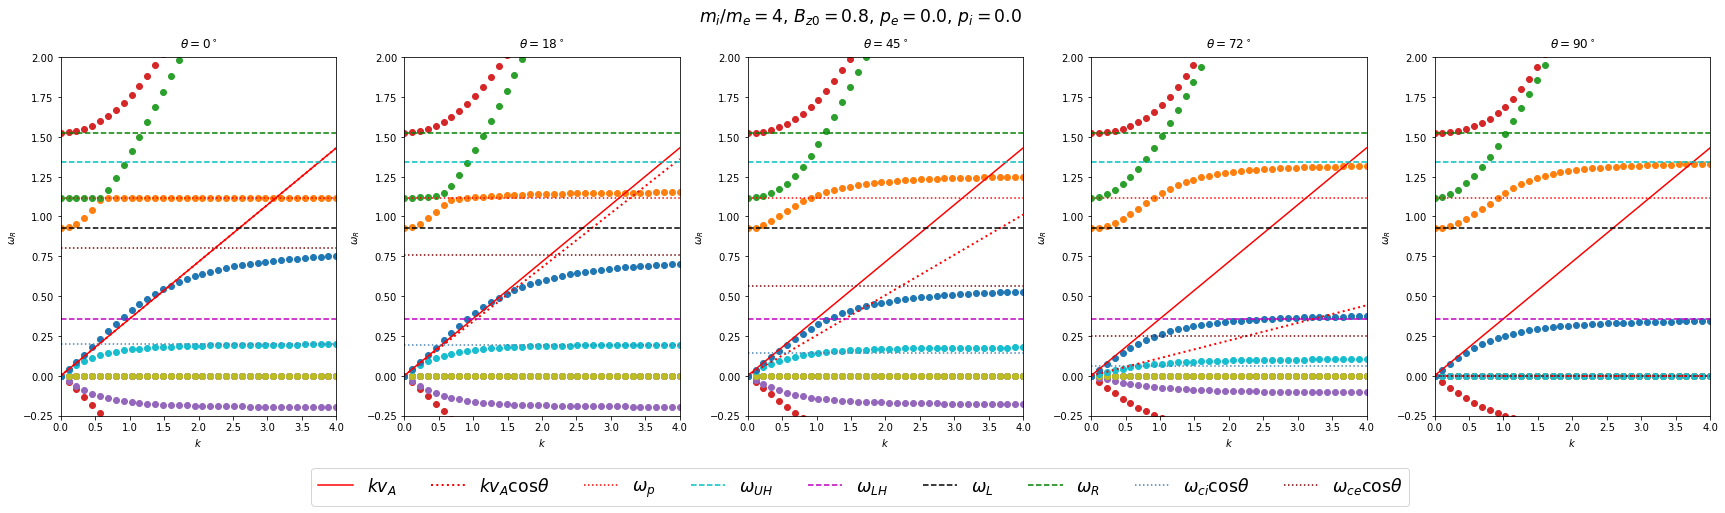

In [5]:
fig, axs = plt.subplots(1, len(thetas), figsize=(24, 6))

for itheta, theta in enumerate(thetas):
    kxs = ks * np.sin(theta)
    kzs = ks * np.cos(theta)
    ax0 = axs[itheta]
    ws = xenon.fluid.k2w_em3d(kxs, kzs, species=species, params=params)
    
    # draw DR
    xenon.common.plot_dr(ks, ws, ax0=ax0)
    ax0.set_ylim(-0.25, 2)
    title = r'$\theta={:.0f}^\circ$'.format(np.rad2deg(thetas[itheta]))
    ax0.set_title(title, va='bottom', y=1)

    # draw characteristic lines/curves to better demonstrate the physics 
    xenon.common.draw_extra_params(
        dr_params, ax0, ks,
        ['vAlf', 'vAlf*cost', 'wp', 'wUH', 'wLH', 'wL', 'wR', 'wce', 'wci'],
        np.cos(theta))

# make legend for the characteristic curves
handles, labels = ax0.get_legend_handles_labels()
if len(handles) > 0:
    fig.legend(handles,
               labels,
               loc='upper center',
               bbox_to_anchor=(0.5, 0),
               bbox_transform=fig.transFigure,
               ncol=len(handles),
               fontsize='xx-large')

fig.tight_layout()
suptitle = r'$m_i/m_e={}$, $B_{{{{z0}}}}={}$, $p_e={}$, $p_i={}$'.format(
    mi, B0, pe, pi)
fig.suptitle(suptitle, va='bottom', y=1, size='xx-large')
plt.show()